In [7]:
from src.cluster.modularity_clustering import modularity_clustering
from src.Graph import Graph
import networkx as nx
import matplotlib.pyplot as plt
import random
import src.cluster.cluster_algorithm as Ca
import numpy as np

G = Graph("networks/special_case_for_networkx.mtx")
G = Graph("networks/out.ucidata-zachary_")

In [21]:
def visualize_segmentation(file, calc_segmentation, mode, optimize):
    nxG = nx.read_gexf(file)
    nxG = nx.relabel_gexf_graph(nxG)
    G = Graph()
    for n in nxG.nodes():
        n = n.replace(" ","_")
        G.add_node(n)
    for e1, e2 in nxG.edges():
        e1 = e1.replace(" ", "_")
        e2 = e2.replace(" ", "_")
        G.add_edge(e1,e2)

    segmentation = calc_segmentation(G, mode = mode, optimize = optimize)

    colors = ["green", "yellow","red", "blue", "pink", "purple", "orange"]
    color_id = 0
    nx_index = [n for n in nxG]
    color_map = [ "black" for n in nxG]
    for segment in segmentation:
        if color_id < len(colors):
            color = colors[color_id]
        else:
            color = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
            print(color)
        for n in nxG:
            if n.replace(" ", "_") in segment:
                color_map[nx_index.index(n)] = color
        color_id += 1

    # 1114, 833, 1997, 764,  947, 164
    seed = random.randint(1,2000)
    print(seed)

    my_pos = nx.spring_layout(nxG, seed = 1104)
    plt.figure(figsize=(12,12))
    nx.draw(nxG, pos = my_pos, node_color= color_map,with_labels=True, node_size=500, edge_color='black', linewidths=1, font_size=8)
    plt.title((mode, optimize), fontsize=30)
    plt.show()

In [22]:
def clustering(G, mode = "cut", optimize="modularity"):
    if mode == "cut":
        if optimize == "modularity":
            cl, _ = Ca.second_heuristic(G)
        else:
            cl, _ = Ca.second_heuristic(G, version = "dis")
    if mode == "merge":
        if optimize == "modularity":
            cl = modularity_clustering(G) #meine funktion
        else:
            cl, _ = Ca.first_heuristic(G, version = "dis")
    return cl

269


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['#2', '#0', 'orange', '#0', 'yellow', '#D', '#E', '#2', '#E', '#3', 'blue', '#F', '#0', '#C', '#3', '#2', '#2', 'purple', '#A', '#0', '#0', '#2', '#0', '#0', 'pink', '#1', '#7', 'green', '#6', '#A', '#F', '#0', 'red', '#E', '#4', 'pink', 'pink', '#A']

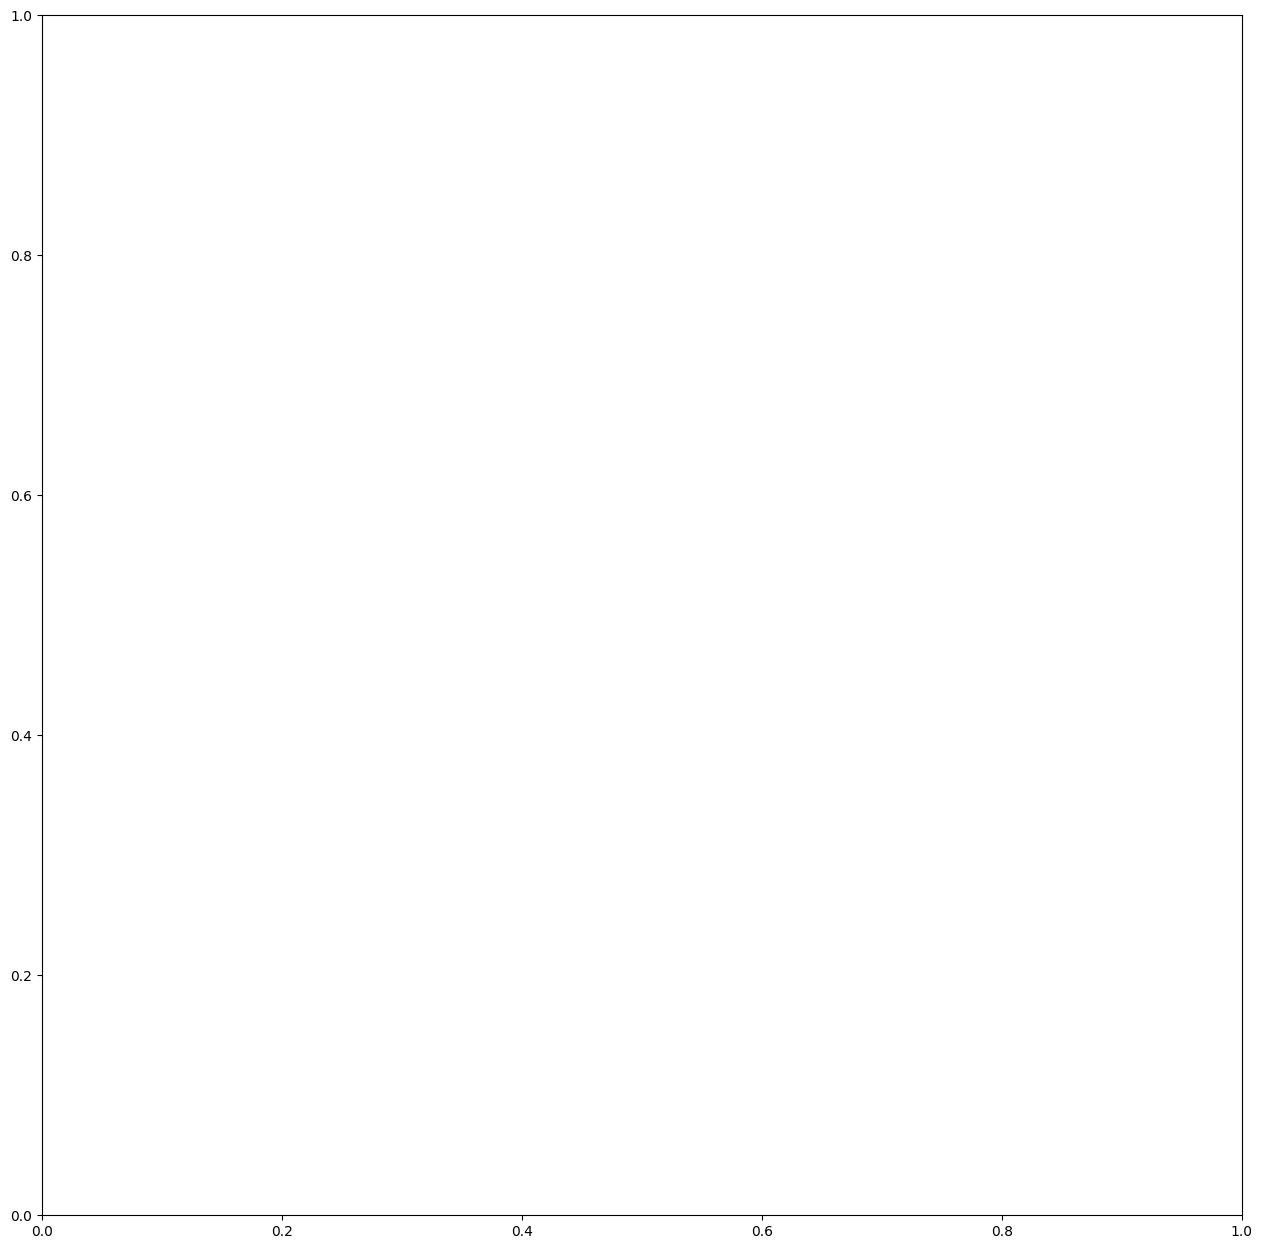

In [23]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "cut", "modularity")

1105


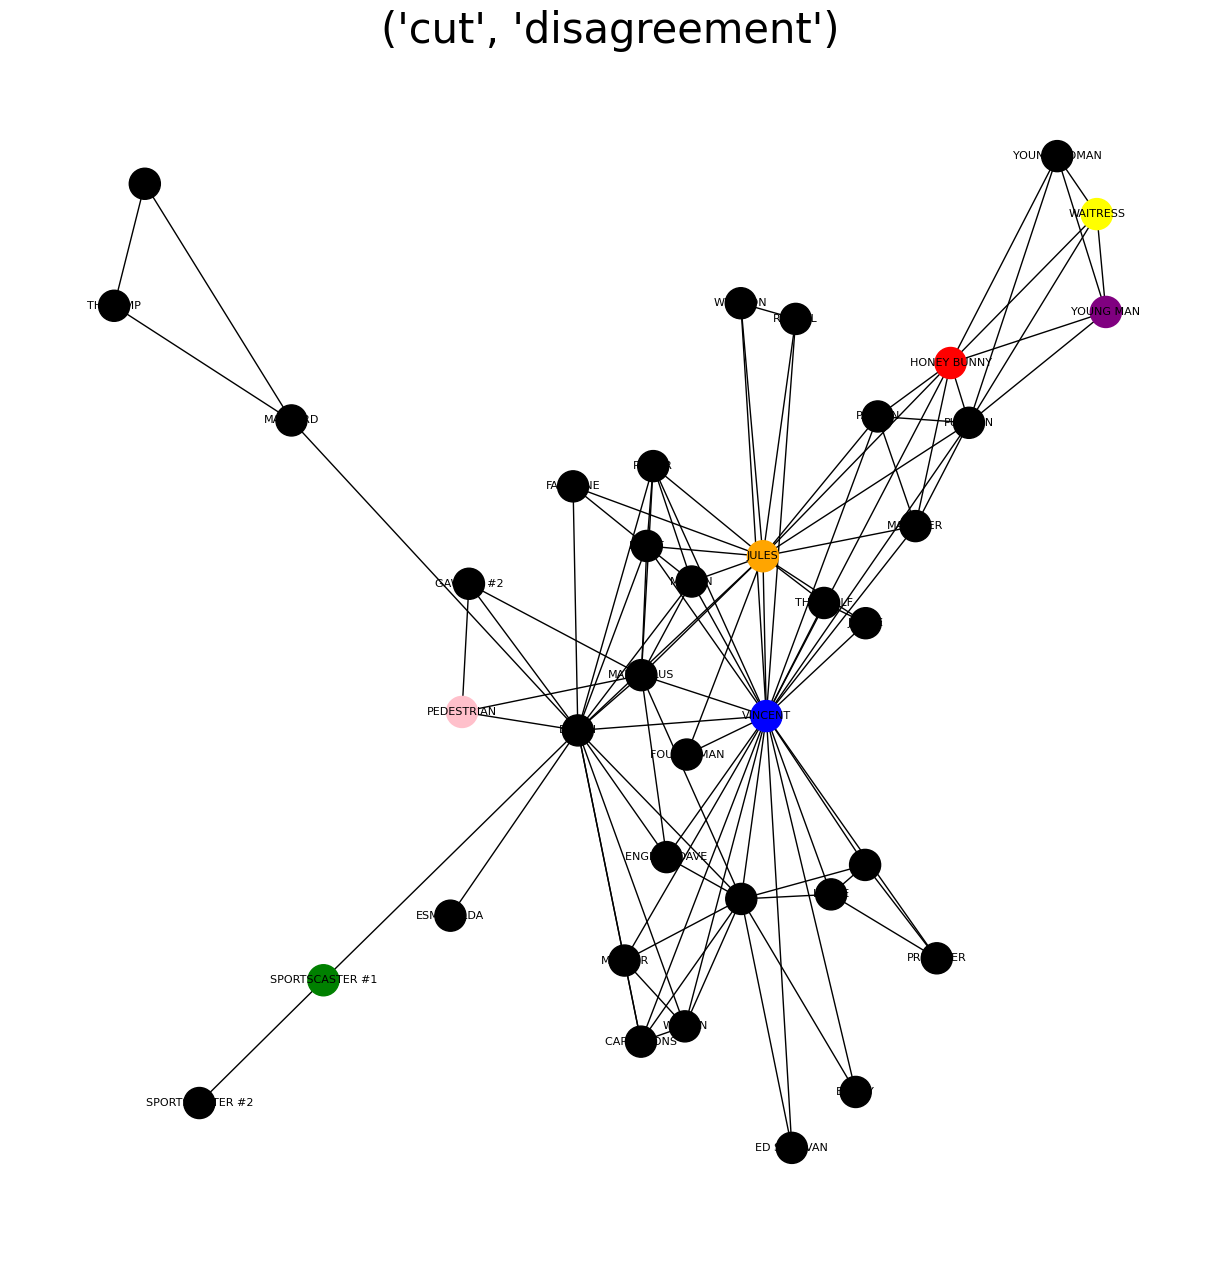

In [17]:

visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "cut", "disagreement")

1886


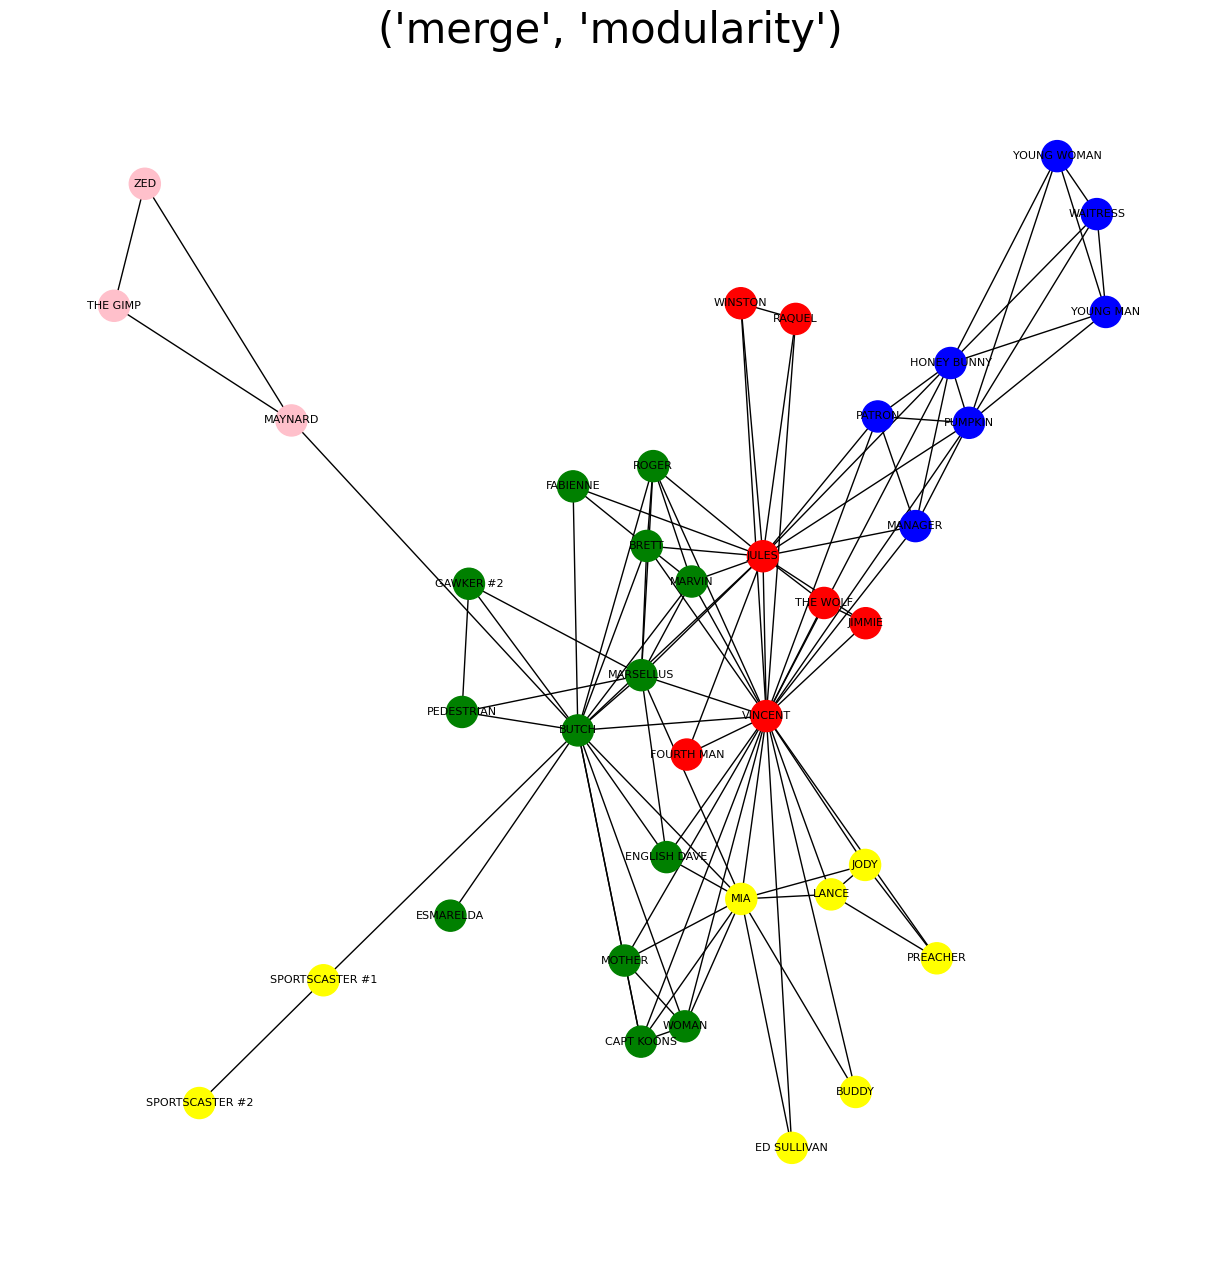

In [18]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "merge", "modularity")


1646


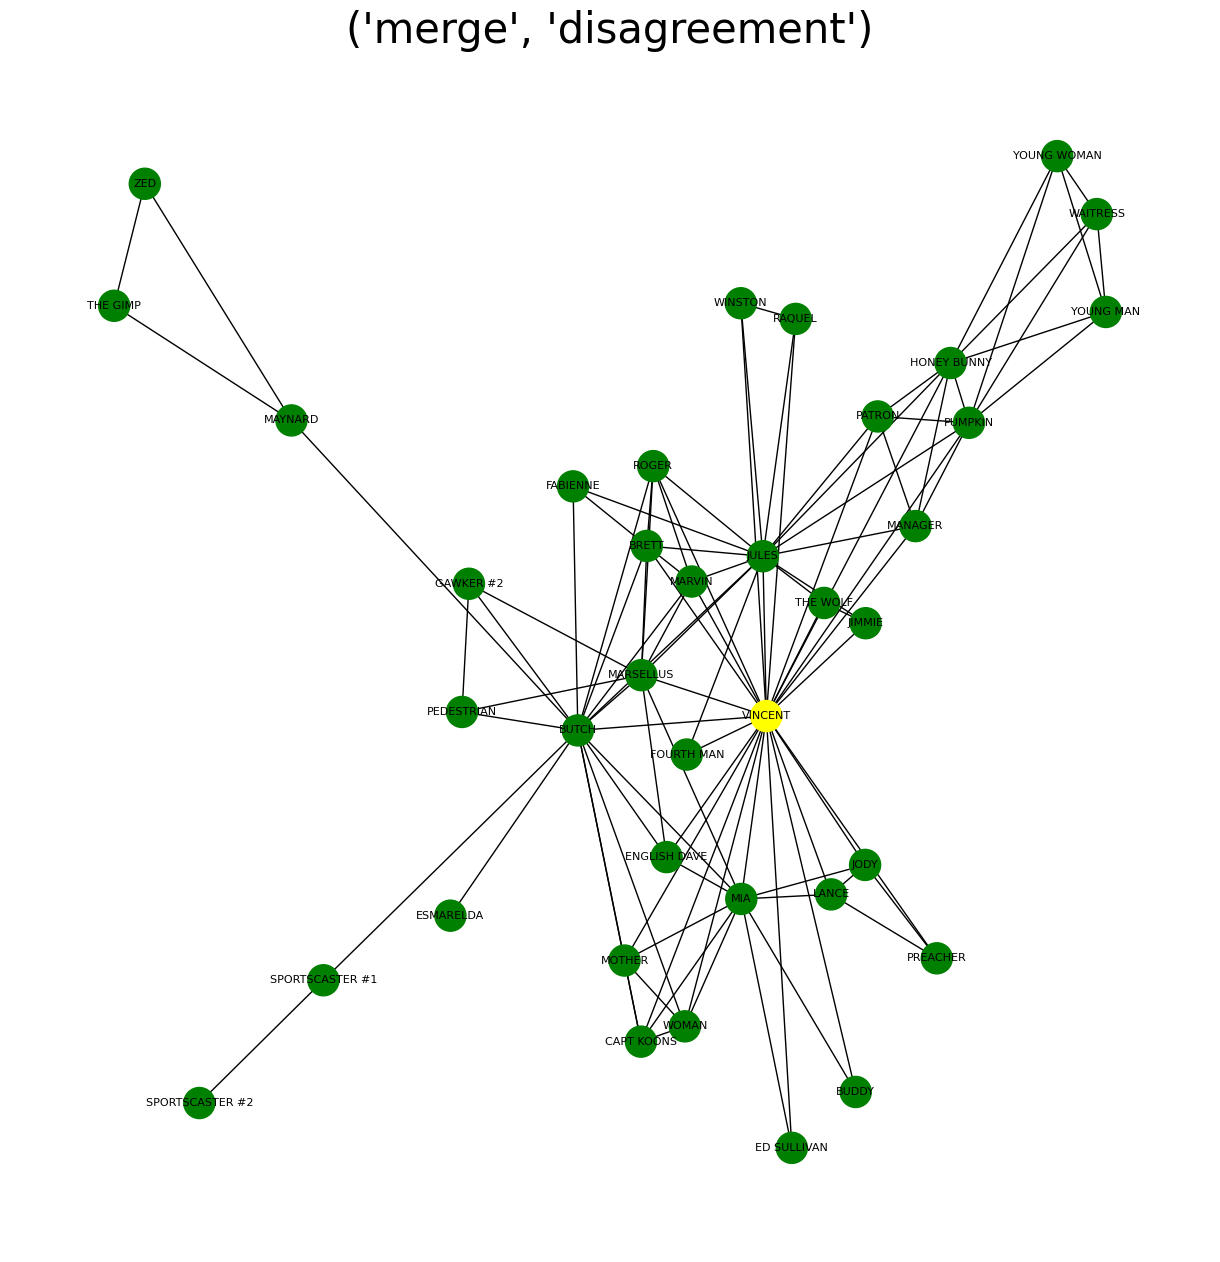

In [20]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "merge", "disagreement")